In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import sys
sys.path.insert(0, "/home1/smaruj/akitaX1-analyses/utils/")
from utils import (read_and_average_virtual_exp, read_and_average_genomic_exp)

2024-01-22 13:25:14.914861: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-22 13:25:14.948123: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-22 13:25:14.948172: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-22 13:25:14.949064: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-22 13:25:14.956028: I tensorflow/core/platform/cpu_feature_guar

In [3]:
# stat metric the analysis is based on
stat_of_analysis_interest = "SCD"

### Insertion data

In [4]:
# reading data, averaging over targets and backgrounds
insertion_df = read_and_average_virtual_exp("/project/fudenber_735/akitaX1_analyses_data/virtual_insertion_experiment", stat_to_average=stat_of_analysis_interest)

reading h5 files to dataframes
averaging over targets
averaging over backgrounds
collecting data for SCD


### Disruption data

In [5]:
# reading data, averaging over targets
disruption_df = read_and_average_genomic_exp("/project/fudenber_735/akitaX1_analyses_data/genomic_disruption_experiment/disruption_by_permutation", stat_to_average=stat_of_analysis_interest)

reading h5 files to dataframes
averaging over targets
collecting data for SCD


## Correlation between insertion and disruption SCD

Text(0, 0.5, 'ave SCD disruption')

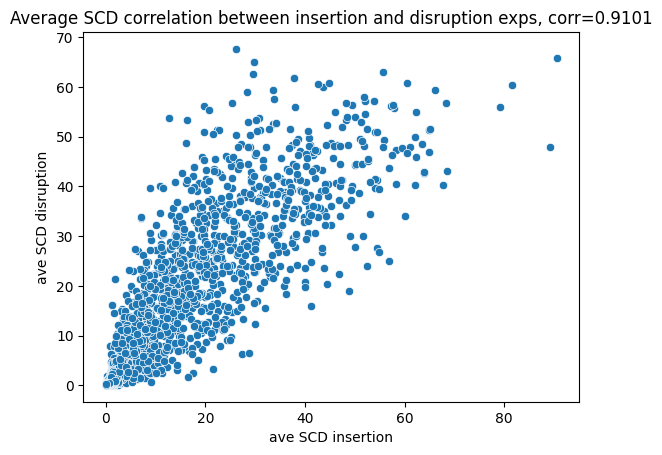

In [8]:
fig, ax = plt.subplots()

sns.scatterplot(x=disruption_df[stat_of_analysis_interest], y=insertion_df[stat_of_analysis_interest])
perm_corr = round(stats.pearsonr(disruption_df[stat_of_analysis_interest], insertion_df[stat_of_analysis_interest]).statistic, 4)
plt.title(f"Average {stat_of_analysis_interest} correlation between insertion and disruption exps, corr={perm_corr}")

# uncomment to add x=y line

# lims = [
#     np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
#     np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
# ]

# # now plot both limits against eachother
# ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
# ax.set_aspect('equal')
# ax.set_xlim(lims)
# ax.set_ylim(lims)

plt.xlabel(f"ave {stat_of_analysis_interest} insertion")
plt.ylabel(f"ave {stat_of_analysis_interest} disruption")